In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
tickers = {
    'US Dollar Index': 'DX-Y.NYB',
    'New Zealand Dollar Index': 'NZD=X',
    'Australian Dollar Index': 'AUD=X',
    'British Pound Index': 'GBP=X',
    'Japanese Yen Index': 'JPY=X',
    'Canadian Dollar Index': 'CAD=X',
    'Euro Index': 'EUR=X',
    'Swiss Franc Index': 'CHF=X',
    'Chinese Yuan Index': 'CNY=X',
    'Mexican Peso Index': 'MXN=X',
    'Brazilian Real Index': 'BRL=X',
    'Russian Ruble Index': 'RUB=X',
    'Indian Rupee Index': 'INR=X',
    'South African Rand Index': 'ZAR=X',
    'South Korean Won Index': 'KRW=X',
    'Turkish Lira Index': 'TRY=X'
}


In [13]:
data = {}
for name, ticker in tickers.items():
    data[name] = yf.download(ticker, start='2000-01-01', end='2024-07-30')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### Function to calculate monthly average returns for different periods (5, 10, and 20 years)


In [14]:
def calculate_monthly_averages(data, years):
    end_year = data.index[-1].year
    start_year = end_year - years
    period_data = data[data.index.year >= start_year]
    
    # Calculate monthly returns
    monthly_returns = period_data['Adj Close'].pct_change().groupby([period_data.index.month, period_data.index.year]).mean()
    monthly_avg = monthly_returns.unstack().mean(axis=1)
    
    return monthly_avg

### Calculate averages for each index


In [15]:
averages = {}
for name in tickers.keys():
    averages[name] = {
        '5_year': calculate_monthly_averages(data[name], 5),
        '10_year': calculate_monthly_averages(data[name], 10),
        '20_year': calculate_monthly_averages(data[name], 20)
    }

### Normalize the data to scale 0 to 1


In [16]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_averages = {}
for name in averages.keys():
    normalized_averages[name] = {
        '5_year': normalize(averages[name]['5_year']),
        '10_year': normalize(averages[name]['10_year']),
        '20_year': normalize(averages[name]['20_year'])
    }


### Plot the data


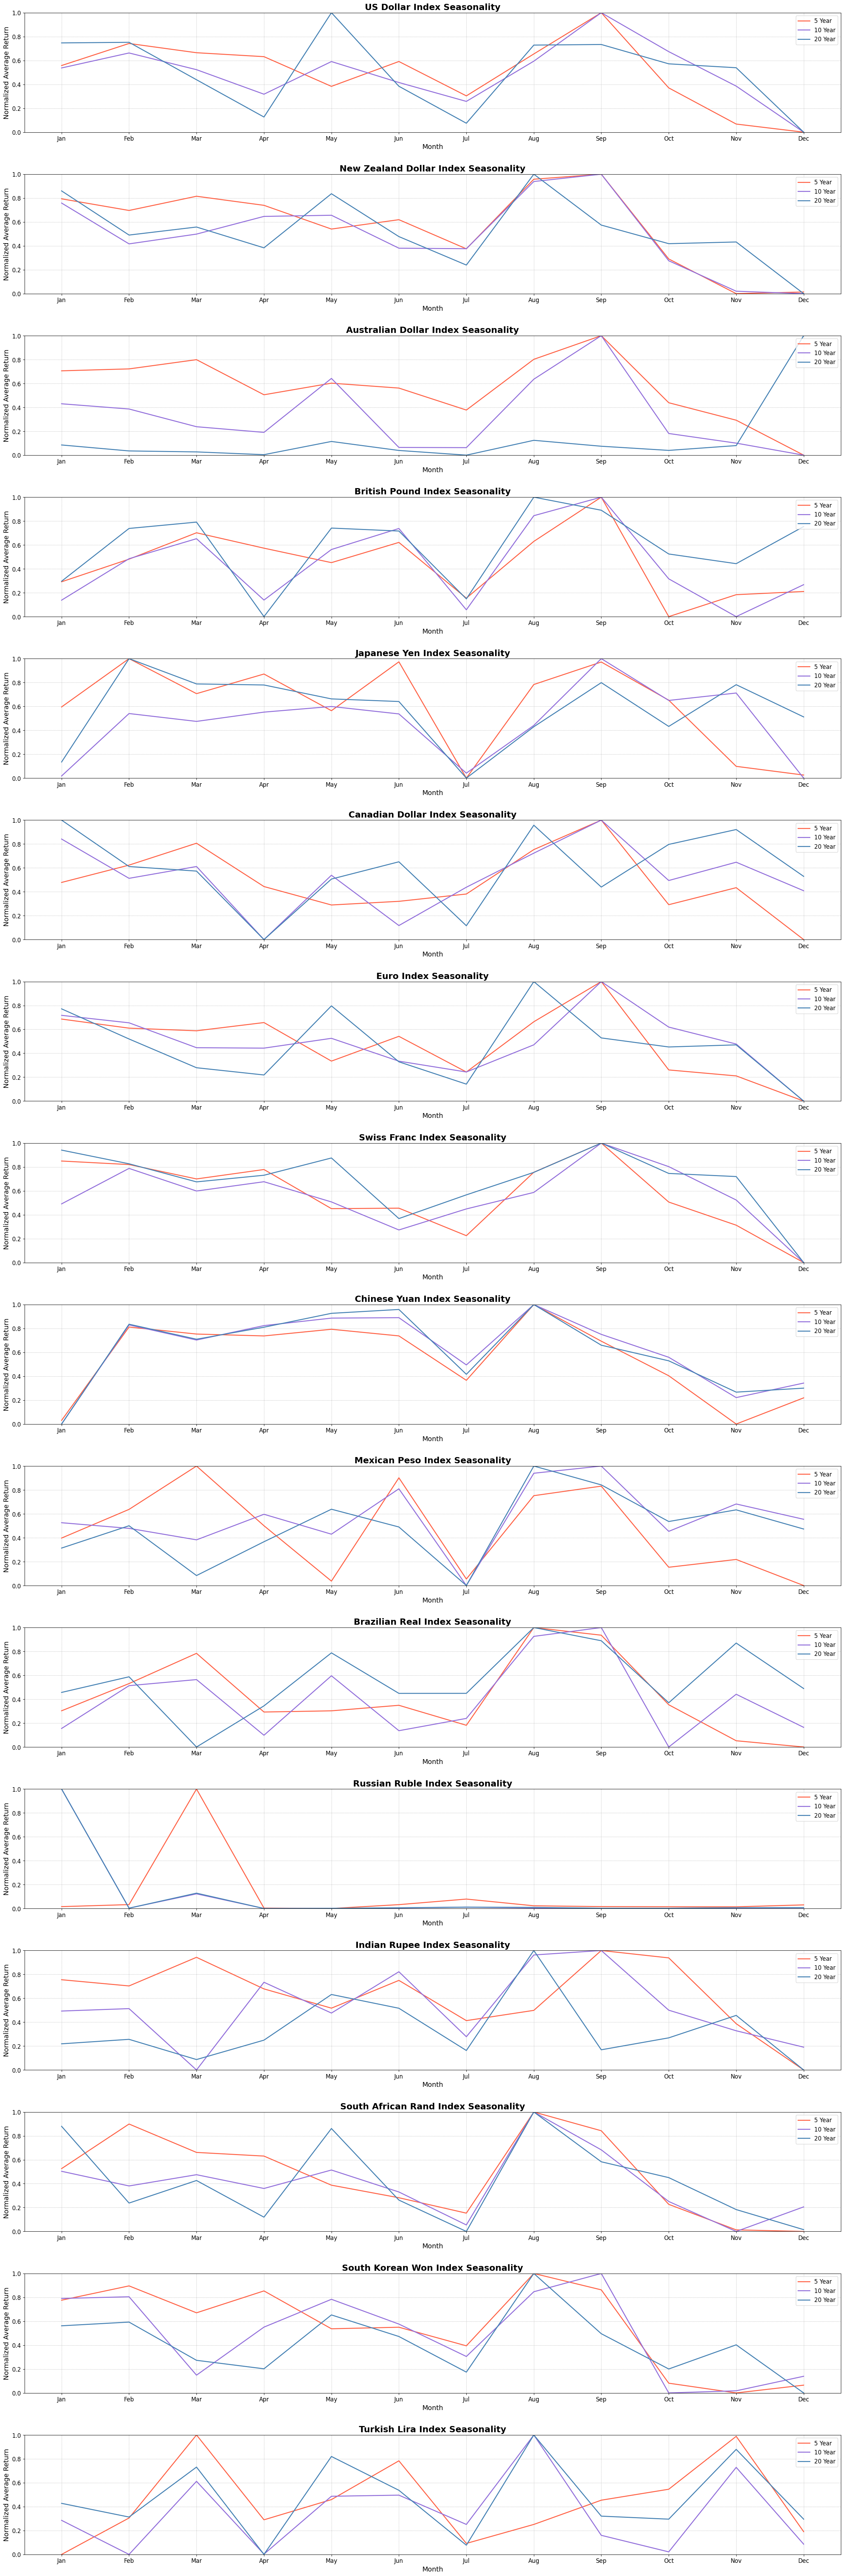

In [17]:
plt.figure(figsize=(25, 75))

for i, (name, norm_avg) in enumerate(normalized_averages.items(), start=1):
    plt.subplot(len(normalized_averages), 1, i)
    plt.plot(norm_avg['5_year'], label='5 Year', color='tomato', linewidth=2)
    plt.plot(norm_avg['10_year'], label='10 Year', color='mediumpurple', linewidth=2)
    plt.plot(norm_avg['20_year'], label='20 Year', color='steelblue', linewidth=2)
    plt.legend(loc='upper right', fontsize=12)
    plt.title(f'{name} Seasonality', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Normalized Average Return', fontsize=14)
    plt.ylim(0, 1)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout(pad=3.0)


plt.show()
